#  09 – Pairwise & Multivariate Plots
**Author:** Hamna Munir  
**Repository:** Python-Libraries-for-AI-ML  
**Topic:** Pairwise & Multivariate Visualization in Seaborn

---
##  Goal
Visualize relationships between **multiple variables** using:
- `pairplot()`
- `PairGrid()`
- `jointplot()`
- `FacetGrid()` advanced usage
- Multivariate heatmaps


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

# Load datasets
penguins = sns.load_dataset("penguins")
iris = sns.load_dataset("iris")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


---
#  1. Pairplot
Pairwise relationships between numerical features.

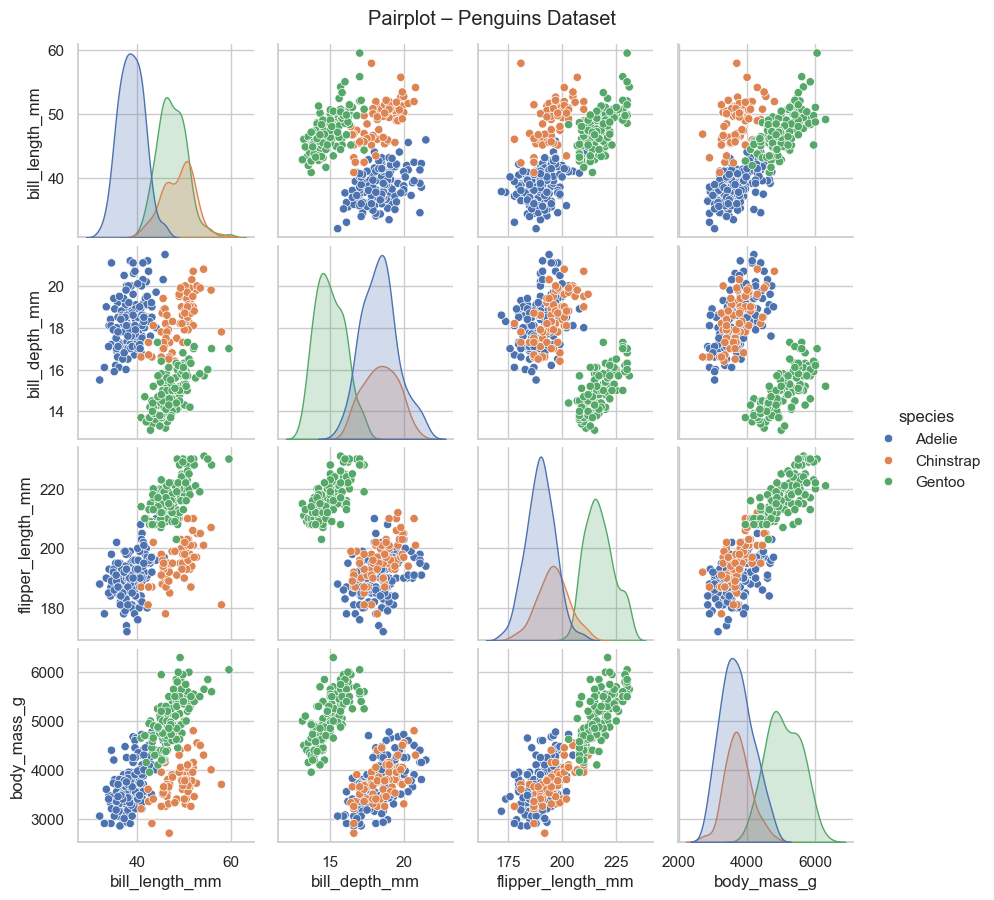

In [2]:
sns.pairplot(penguins, hue="species", height=2.2, diag_kind="kde")
plt.suptitle("Pairplot – Penguins Dataset", y=1.02)
plt.show()

---
#  2. PairGrid (Advanced Pairplot)
Full manual control over plot types.

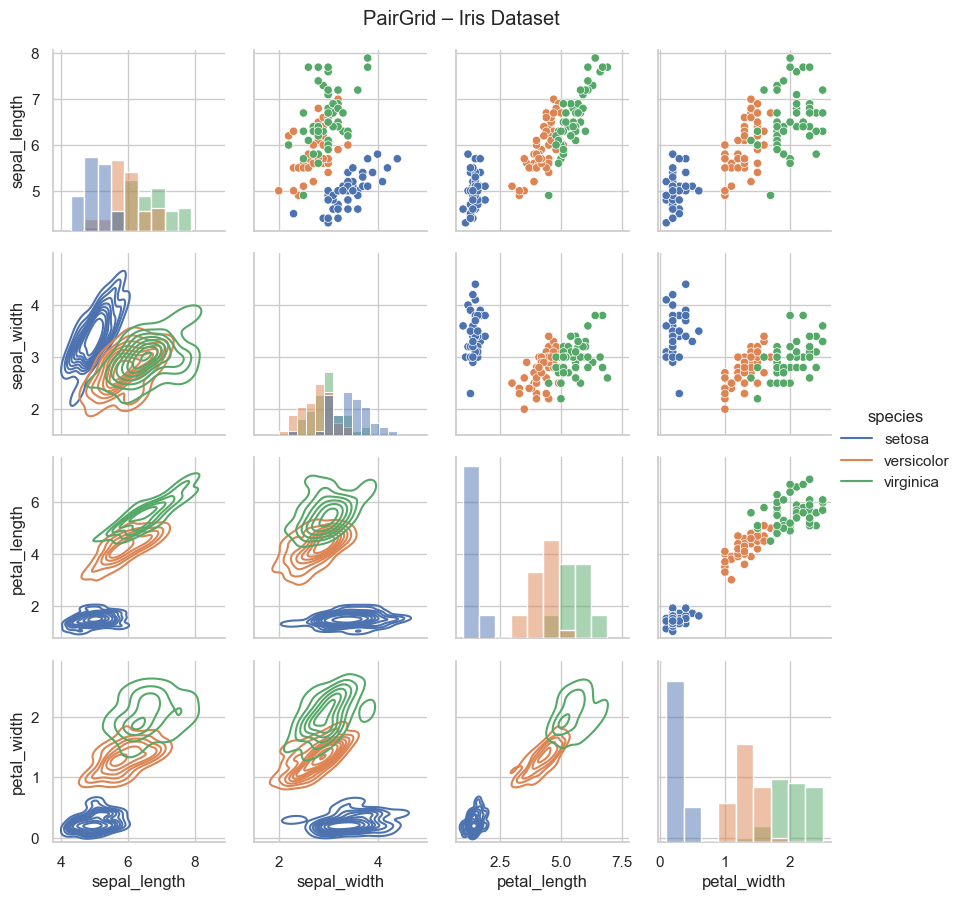

In [3]:
g = sns.PairGrid(iris, hue="species", height=2.2)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.suptitle("PairGrid – Iris Dataset", y=1.02)
plt.show()

---
#  3. Jointplot
Visualize **relationship + distribution** simultaneously.

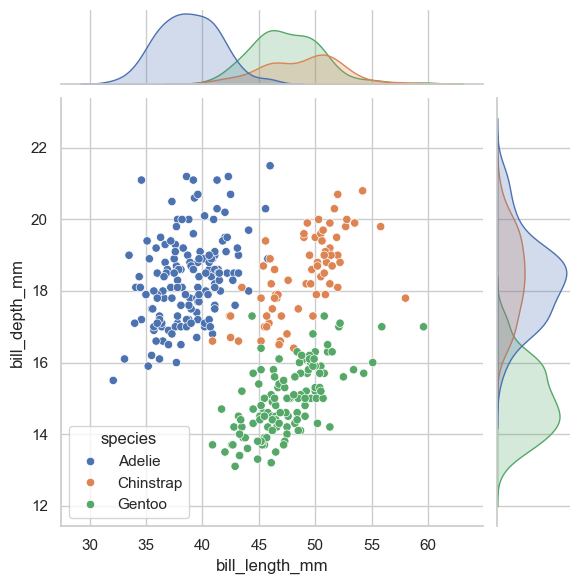

In [4]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    kind="scatter"
)

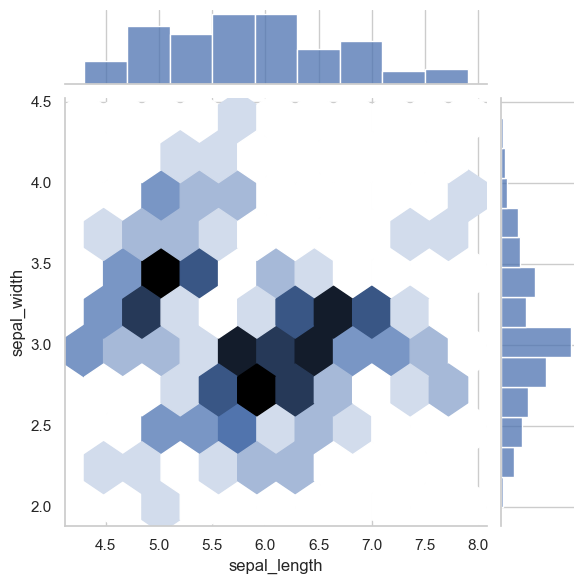

In [5]:
sns.jointplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    kind="hex"
)

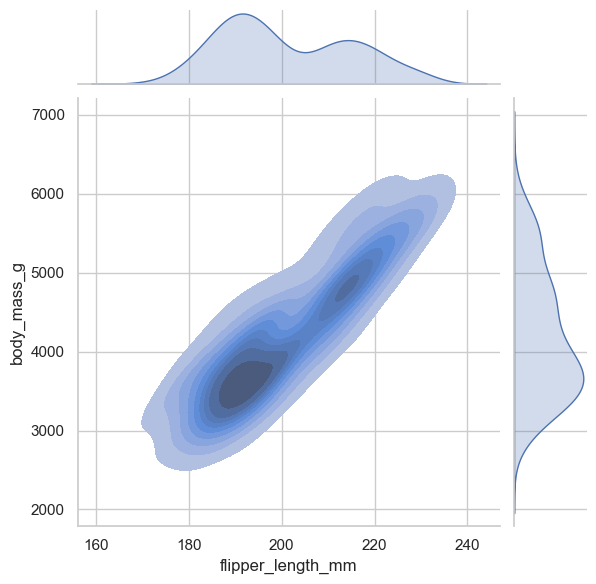

In [6]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="body_mass_g",
    kind="kde",
    fill=True
)

---
#  4. FacetGrid – Multivariate Visualization

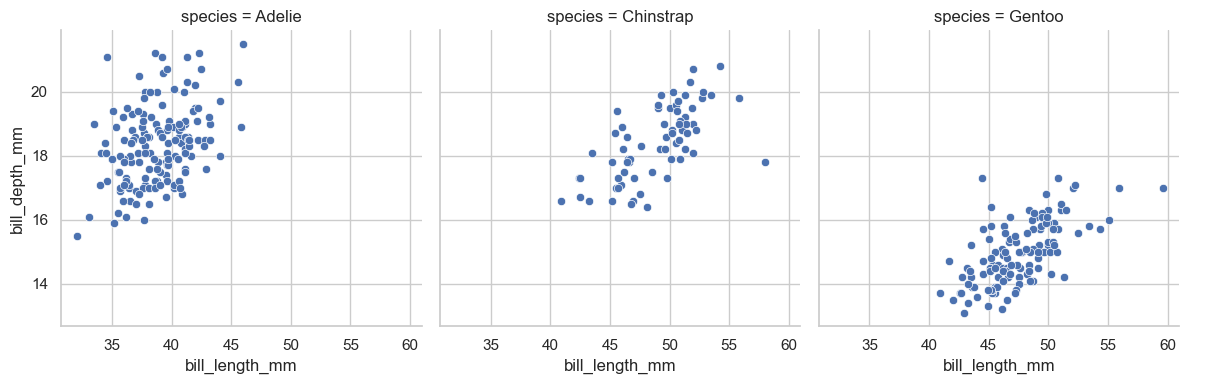

In [7]:
g = sns.FacetGrid(penguins, col="species", height=4)
g.map_dataframe(sns.scatterplot, x="bill_length_mm", y="bill_depth_mm")
g.add_legend()
plt.show()

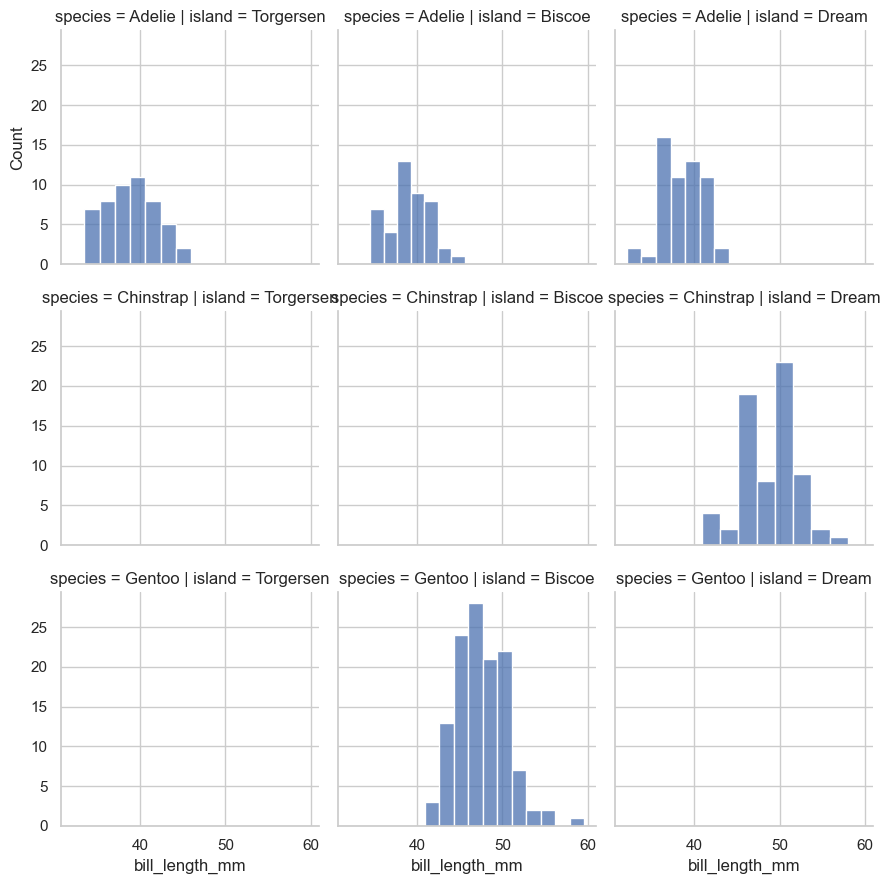

In [8]:
g = sns.FacetGrid(penguins, row="species", col="island", height=3)
g.map_dataframe(sns.histplot, x="bill_length_mm")
plt.show()

---
#  5. Multivariate Heatmaps
Using correlation matrix of Iris dataset.

In [9]:
corr = iris.drop(columns=["species"]).corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


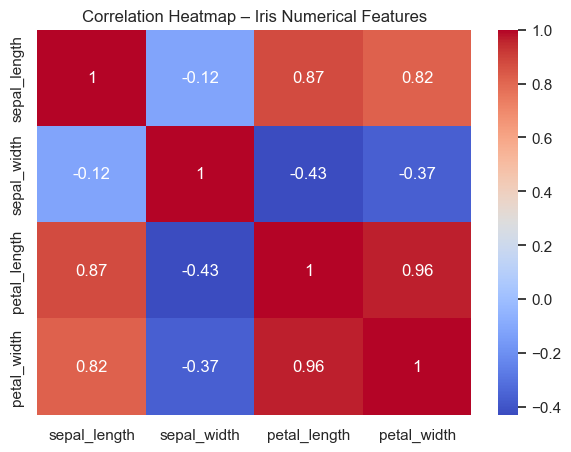

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap – Iris Numerical Features")
plt.show()

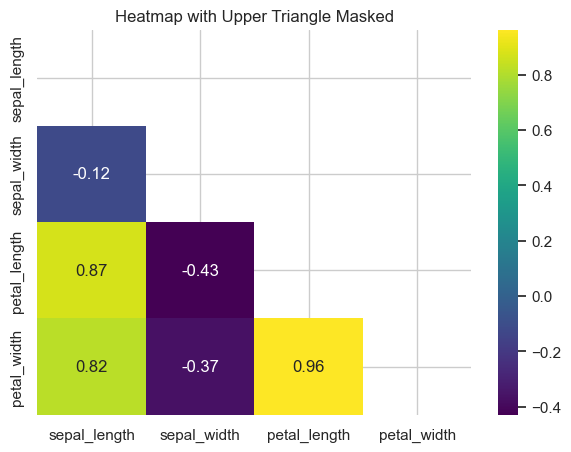

In [11]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="viridis", mask=mask)
plt.title("Heatmap with Upper Triangle Masked")
plt.show()

---
# Summary
In this notebook, you learned:
- Pairwise visualization with `pairplot()`
- Advanced `PairGrid()` customization
- `jointplot()` for detailed 2-variable analysis
- Multivariate `FacetGrid` visualizations
- Heatmaps for multivariable correlation

Your file is complete! 🎉